In [6]:
import gizmo_analysis as gizmo
import h5py
import halo_analysis as halo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import ascii

In [7]:
def potential_correction(ptype, part):
    potential_max = 0
    spec_name = ptype
    if "potential" in part[spec_name] and part[spec_name]["potential"].max() > potential_max:
        potential_max = part[spec_name]["potential"].max()

    return potential_max

In [8]:
# fire_dir = "/Volumes/My Passport for Mac/m12i_res7100"
fire_dir = "/Users/z5114326/Documents/SampleData/m12i_res7100"
data_dir = "/Users/z5114326/Documents/GitHub/GC_kinematics/data/result/m12i"
pro_dir = data_dir + "/processed/"

it = 0
r, s, a = 1, 1, 2
save_file = pro_dir + "kin_it%d_r%d_s%d_a%d.hdf5" % (it, r, s, a)
kin_df = pd.read_hdf(save_file, "df")

In [9]:
snap = 600
part = gizmo.io.Read.read_snapshots(["star", "dark"], "index", snap, fire_dir)


# in utilities.simulation.Snapshot():
* reading:  Users/z5114326/Documents/SampleData/m12i_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Users/z5114326/Documents/SampleData/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'dark']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

* reading cosmological parameters from:  Users/z5114326/Documents/SampleData/m12i_res7100/initial_condition/ic_agora_m12i.conf

* checking sanity of particle properties


# in gizmo_analysis.gizmo_track.ParticleCoordinate():
  read 1 host (pos

In [10]:
star_pot_cor = potential_correction("star", part)
dark_pot_cor = potential_correction("dark", part)

In [11]:
lz = np.array(kin_df["lz"])
ep = kin_df["ep"]
ek = np.array(kin_df["ek"])
# ptypes = kin_df["ptype"]

# ep = []

# for ptype, pot in zip(kin_df["ptype"], kin_df["ep"]):
#     if ptype == "star":
#         ep.append(pot - star_pot_cor)
#     elif ptype == "dark":
#         ep.append(pot - dark_pot_cor)

ep = np.array(ep)
et = ek + ep

Text(0.5, 1.0, 'Iteration 1 (m12i)')

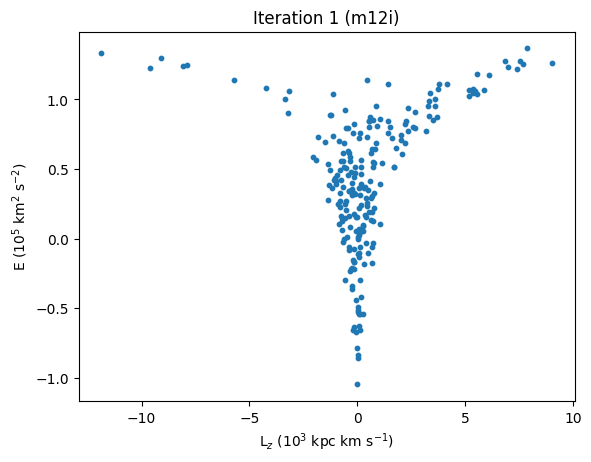

In [12]:
plt.scatter(lz * 10**-3, et * 10**-5, s=10)

# plt.xlim([-20, 20])
# plt.ylim([-1, 1.5])
plt.xlabel("L$_{z}$ (10$^{3}$ kpc km s$^{-1}$)")
plt.ylabel("E (10$^{5}$ km$^{2}$ s$^{-2}$)")
plt.title("Iteration 1 (m12i)")

In [13]:
chen_data = "/Users/z5114326/Documents/GitHub/GC_kinematics/data/external/mw_chen_gnedin_2024.txt"

with open(chen_data) as f:
    content = f.readlines()
    # content = content[13:]
chen = ascii.read(content)
data = chen[chen["col1"] == 25236877]

In [14]:
x = data["col7"]
y = data["col8"]
z = data["col9"]
vx = data["col10"]
vy = data["col11"]
vz = data["col12"]
ep = data["col18"]

ek = [0.5 * (vx_i**2 + vy_i**2 + vz_i**2) for vx_i, vy_i, vz_i in zip(vx, vy, vz)]
et = np.array([ek_i + ep_i for ek_i, ep_i in zip(ek, ep)])

lz = np.array([x_i * vy_i - y_i * vx_i for x_i, vy_i, y_i, vx_i in zip(x, vy, y, vx)])

Text(0.5, 1.0, 'Chen MW Catalogue (m12i)')

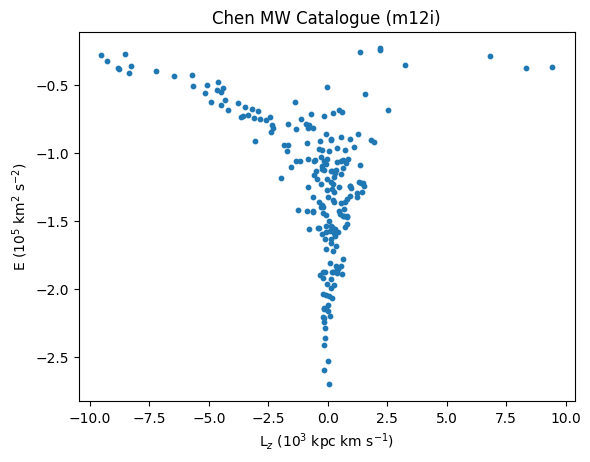

In [15]:
plt.scatter(lz * 10**-3, et * 10**-5, s=10)

# plt.xlim([-20, 20])
# plt.ylim([-1, 1.5])
plt.xlabel("L$_{z}$ (10$^{3}$ kpc km s$^{-1}$)")
plt.ylabel("E (10$^{5}$ km$^{2}$ s$^{-2}$)")
plt.title("Chen MW Catalogue (m12i)")

In [16]:
halo_file = "/Users/z5114326/Documents/GitHub/GC_kinematics/data/base_halo/halo_25236877.hdf5"

f_halo = h5py.File(halo_file)

In [17]:
gc_id_lst = np.array(kin_df["GC_ID"])

In [18]:
idx_lst = []
for gc_id, ptype in zip(kin_df["GC_ID"], kin_df["ptype"]):
    if ptype == "star":
        idx = np.where(np.array(f_halo["snap_596_halo_25236877"]["stars"]["ParticleIDs"]) == gc_id)[0][0]
        idx_lst.append(idx)

In [19]:
for idx in idx_lst:
    print(f_halo["snap_596_halo_25236877"]["stars"]["Potential"][idx])

-12538.5673828125
19231.01953125
25163.609375
31966.505859375
30623.478515625
-29709.58203125
-79872.84375
54956.4296875
15520.0419921875
36402.16015625
1199.949951171875
36088.54296875
47883.70703125
-14974.8359375
62328.234375
62140.24609375
10459.140625
60712.671875
62706.9296875
83081.2265625
68701.5546875
52079.96875
13915.96484375
37267.1796875
-53152.85546875
25318.03515625
45101.46484375
-1921.872802734375
-5414.70458984375
-26216.33203125
-11972.849609375
8781.1787109375
9340.125
-30687.759765625
30727.01953125
22155.40234375
23533.958984375
58862.79296875
32708.771484375
-53701.359375
-59472.44140625
31174.27734375
-62551.546875
-21011.078125
18576.962890625
-68266.234375
5765.51416015625
-75242.046875
-4789.78173828125
1981.5997314453125
-21606.94140625
-66609.84375
42443.9296875
-23949.51953125
-13062.095703125
-45814.58203125
44288.26953125
27157.560546875
11181.3974609375
6109.68310546875
-116541.9609375
-32512.611328125
39003.1640625
1011.5646362304688
-35798.4921875
-17

In [21]:
r = [np.linalg.norm([xi, yi, zi]) for xi, yi, zi in zip(x, y, z)]

In [23]:
np.max(r)

168.8272906078872